# Exploratory Data Analysis

### Why do we need to perform Exploratory Data Analysis?

### Objective: 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
import seaborn as sns
plt.style.use('ggplot')
from statsmodels.compat import lzip
#import statsmodels.api as sm
#import statsmodels.stats.api as sms
#from statsmodels.formula.api import ols
from scipy.stats import zscore
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFECV
#from mLxtend.feature_selecton import SequentialFeatureSelector as sfs#
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV



## Load data

In [2]:
stud_data=pd.read_csv(r"C:/Users/Bhavana M/miniproject/inputdata/StudentsPerformance.csv")

In [3]:
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
stud_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
stud_data.shape

(1000, 8)

In [6]:
stud_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
stud_data.isna().sum().sum()

0

### Graph Plots 

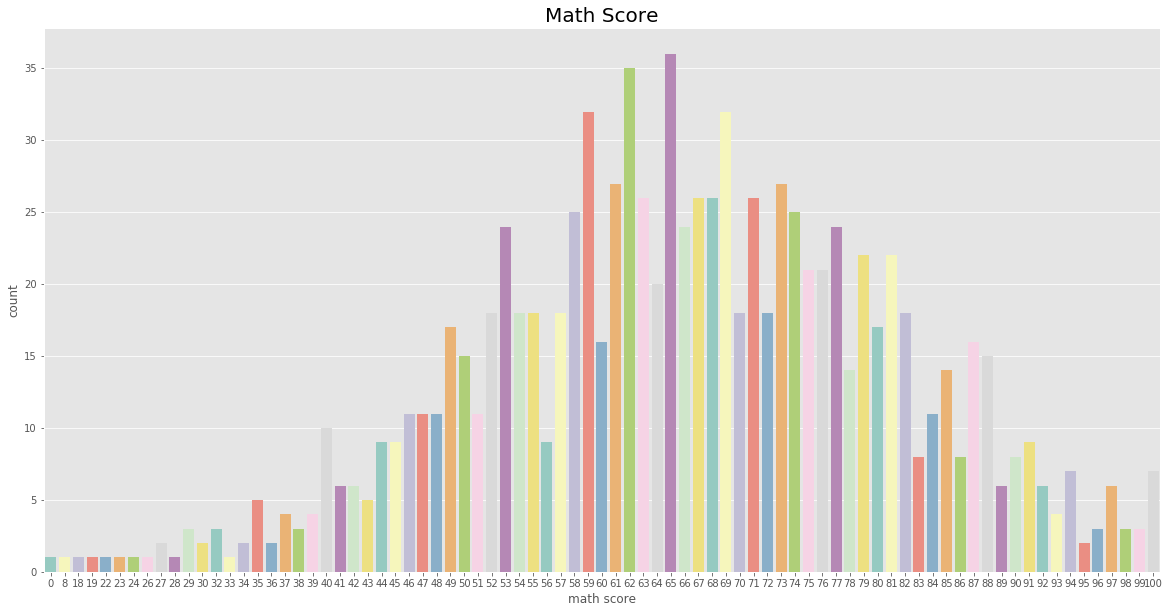

In [8]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(stud_data['math score'],palette='Set3')
plt.title('Math Score',fontsize=20)
plt.show()

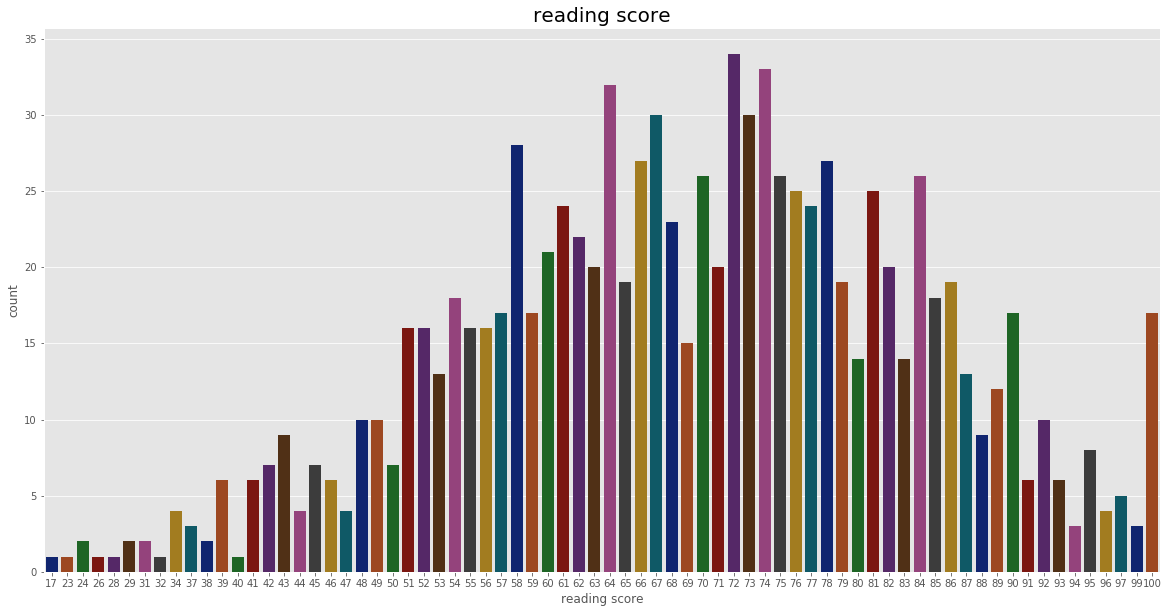

In [9]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(stud_data['reading score'],palette='dark')
plt.title('reading score',fontsize=20)
plt.show()

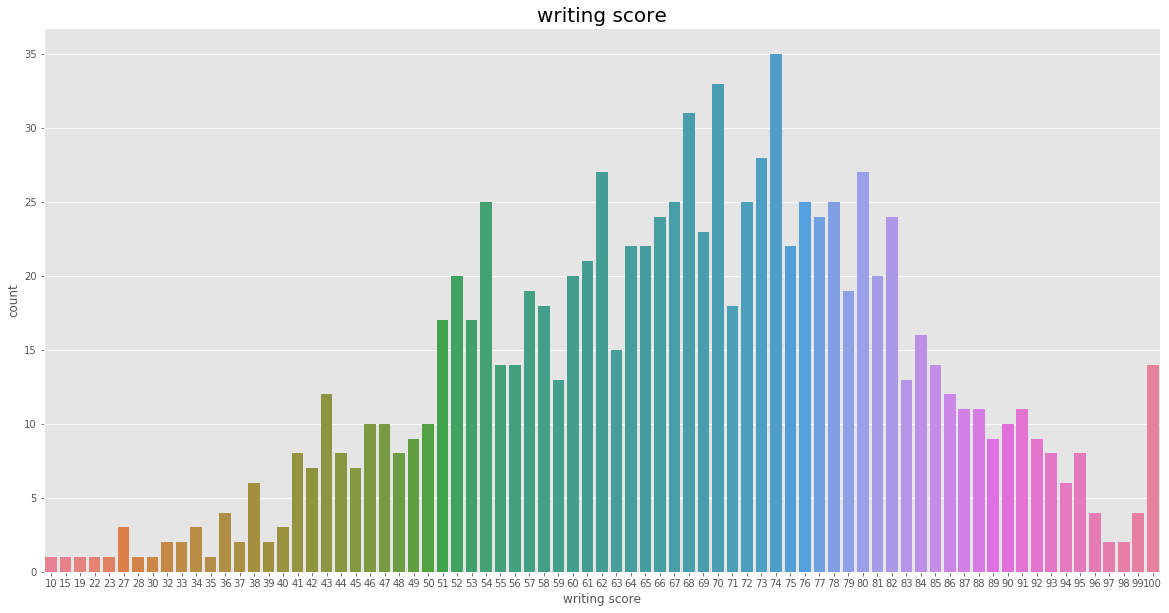

In [10]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(stud_data['writing score'],palette='husl')
plt.title('writing score',fontsize=20)
plt.show()

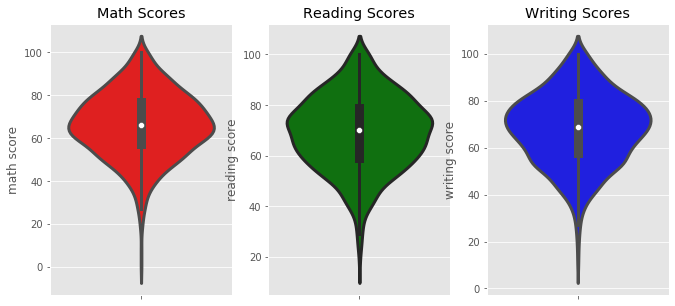

In [11]:
plt.figure(figsize=(15,5))
plt.subplots_adjust()#setting default params only
plt.subplot(142)
plt.title('Math Scores')
sns.violinplot(y='math score',data=stud_data,color='r',linewidth=3)
plt.subplot(143)
plt.title('Reading Scores')
sns.violinplot(y='reading score',data=stud_data,color='g',linewidth=3)
plt.subplot(144)
plt.title('Writing Scores')
sns.violinplot(y='writing score',data=stud_data,color='b',linewidth=3)
plt.show()

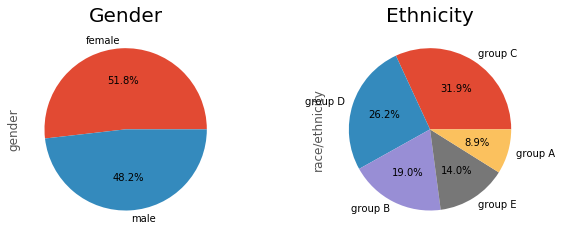

In [12]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.5)#using default values for other parameters
plt.subplot(141)
plt.title('Gender',fontsize=20)
stud_data['gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(142)
plt.title('Ethnicity',fontsize=20)
stud_data['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")


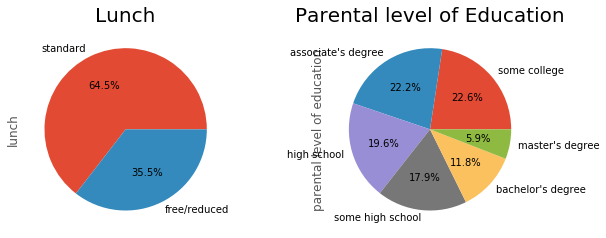

In [13]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.5)#using default values for other parameters
plt.subplot(141)
plt.title('Lunch',fontsize=20)
stud_data['lunch'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(142)
plt.title('Parental level of Education',fontsize=20)
stud_data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")


## Univariate Analysis 

skew: -0.27893514909431694
kurtosis: 0.27496405752108455


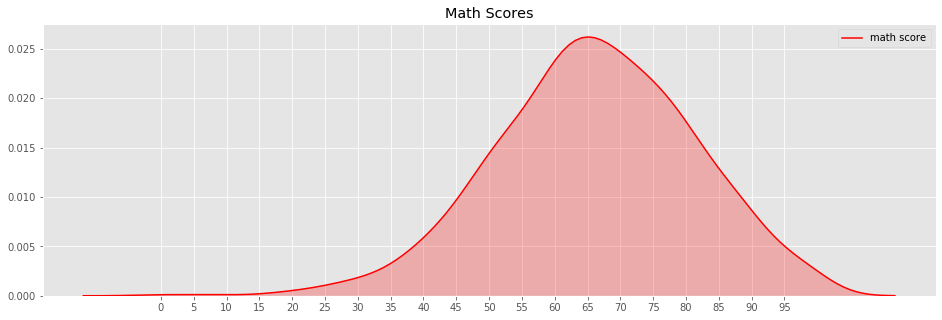

In [14]:
#math score
target='math score'
plt.figure(figsize=(16,5))
plt.title('Math Scores')
print("skew: {}".format(stud_data[target].skew()))
print("kurtosis: {}".format(stud_data[target].kurtosis()))
ax=sns.kdeplot(stud_data[target],shade=True,color='r')
plt.xticks([i for i in range(0,100,5)])
plt.show()

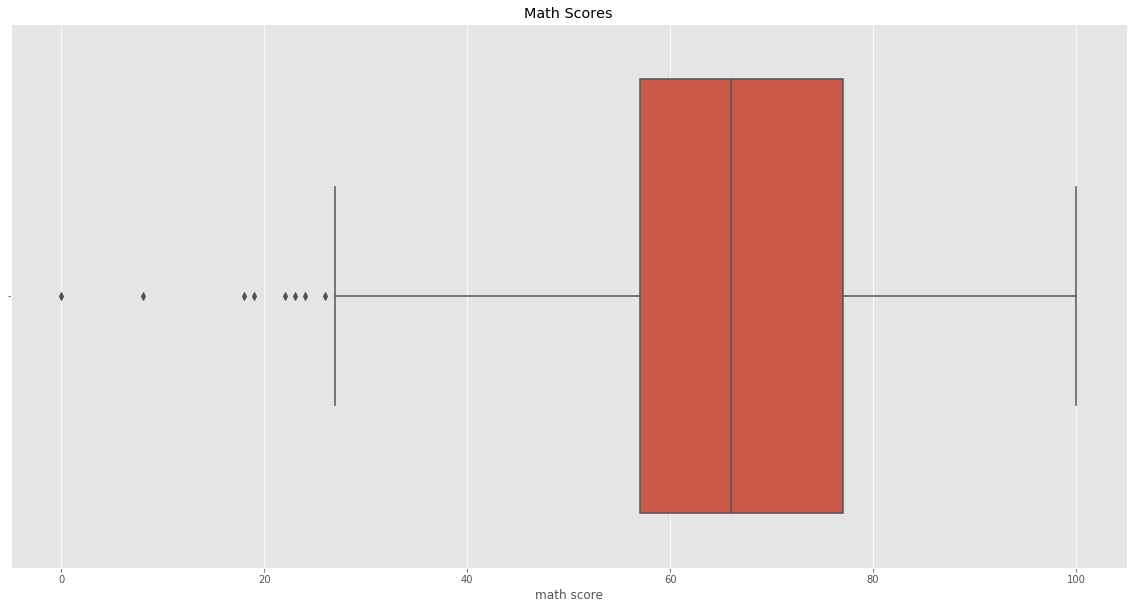

In [15]:
ax=sns.boxplot(stud_data[target])
plt.title('Math Scores')
plt.show()

### Observations

In [16]:
y_outlier_points=stud_data[abs(zscore(stud_data[target]))>=3]
y_outlier_points

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
787,female,group B,some college,standard,none,19,38,32
980,female,group B,high school,free/reduced,none,8,24,23


skew: -0.25910451810923063
kurtosis: -0.0682654585647704


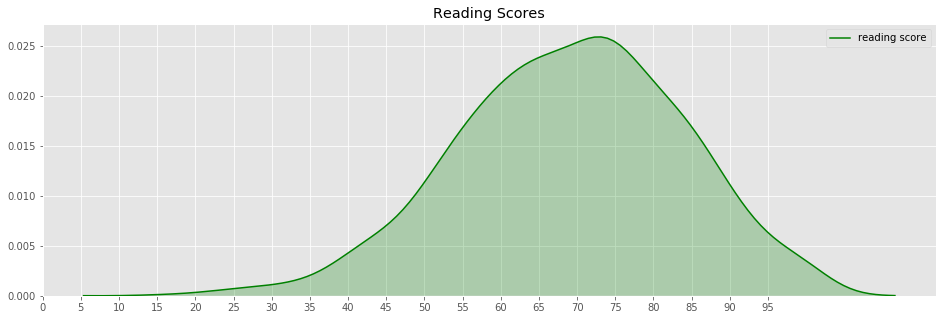

In [17]:
#reading score
target='reading score'
plt.figure(figsize=(16,5))
plt.title('Reading Scores')
print("skew: {}".format(stud_data[target].skew()))
print("kurtosis: {}".format(stud_data[target].kurtosis()))
ax=sns.kdeplot(stud_data[target],shade=True,color='g')
plt.xticks([i for i in range(0,100,5)])
plt.show()

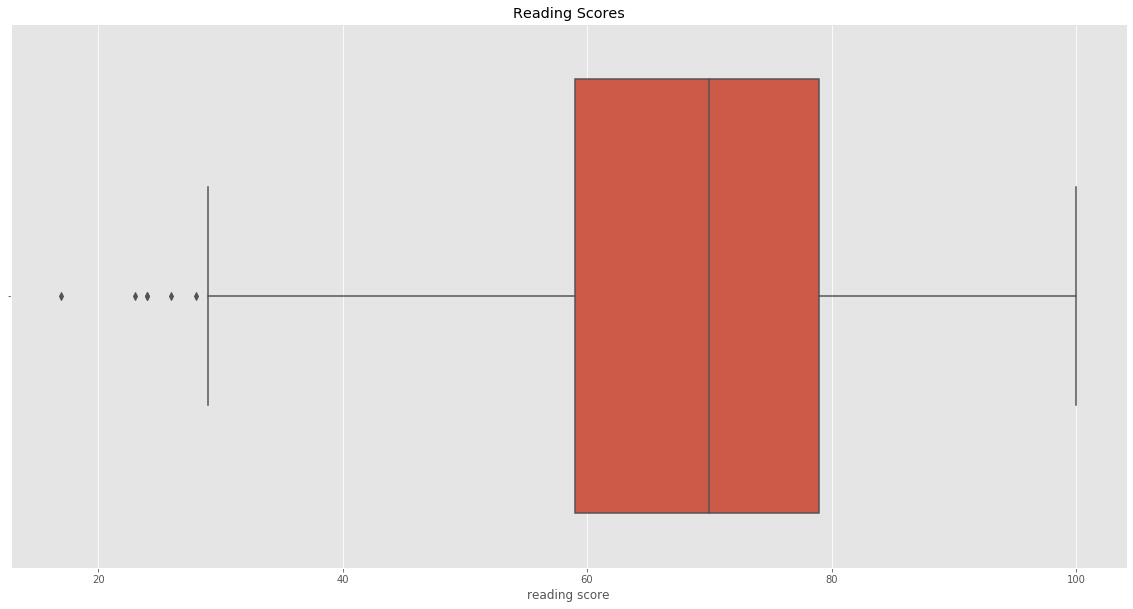

In [18]:
ax=sns.boxplot(stud_data[target])
plt.title('Reading Scores')
plt.show()

### Observations

In [19]:
y_outlier_points=stud_data[abs(zscore(stud_data[target]))>=3]
y_outlier_points

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


skew: -0.28944397150761897
kurtosis: -0.03336461500693577


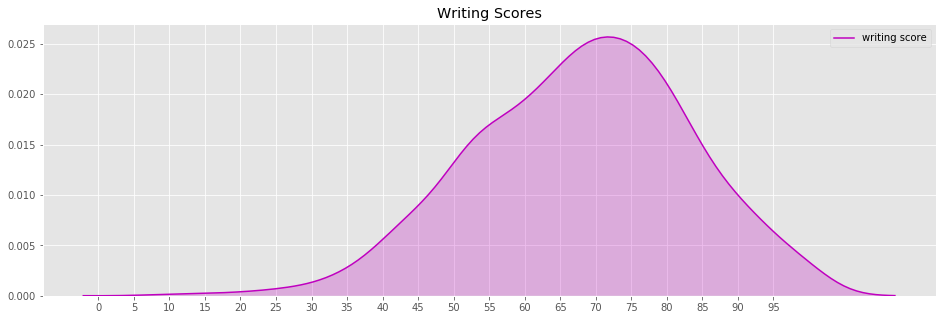

In [20]:
#writing score
target='writing score'
plt.figure(figsize=(16,5))
plt.title('Writing Scores')
print("skew: {}".format(stud_data[target].skew()))
print("kurtosis: {}".format(stud_data[target].kurtosis()))
ax=sns.kdeplot(stud_data[target],shade=True,color='m')
plt.xticks([i for i in range(0,100,5)])
plt.show()

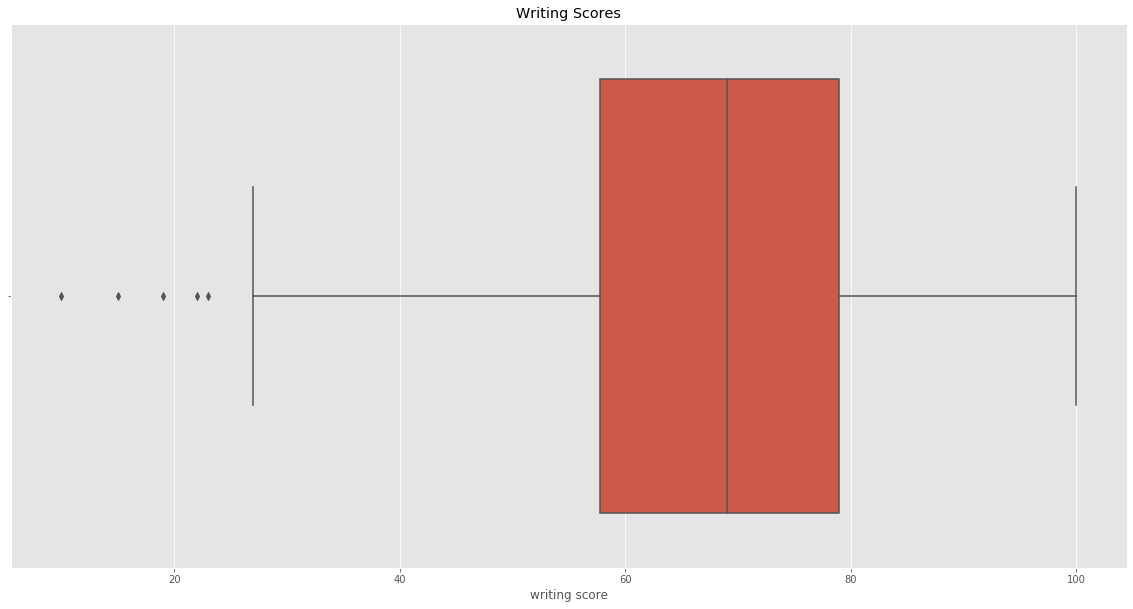

In [21]:
ax=sns.boxplot(stud_data[target])
plt.title('Writing Scores')
plt.show()

#### Observations

In [22]:
y_outlier_points=stud_data[abs(zscore(stud_data[target]))>=3]
y_outlier_points

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15


In [23]:
target=['math score','reading score','writing score']
df=stud_data.drop(target,axis=1)
categorical_columns=df.select_dtypes(include='object').columns.tolist()
numerical_columns=df.select_dtypes(exclude='object').columns.tolist()
print('dependent and categorical columns')
categorical_columns

dependent and categorical columns


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [24]:
categorical_columns=stud_data.select_dtypes(include='object').columns.tolist()
numerical_columns=stud_data.select_dtypes(exclude='object').columns.tolist()
print('independent and numerical columns')
numerical_columns


independent and numerical columns


['math score', 'reading score', 'writing score']

#### Analyzing categorical columns 

1 gender
2 race/ethnicity
3 parental level of education
4 lunch
5 test preparation course


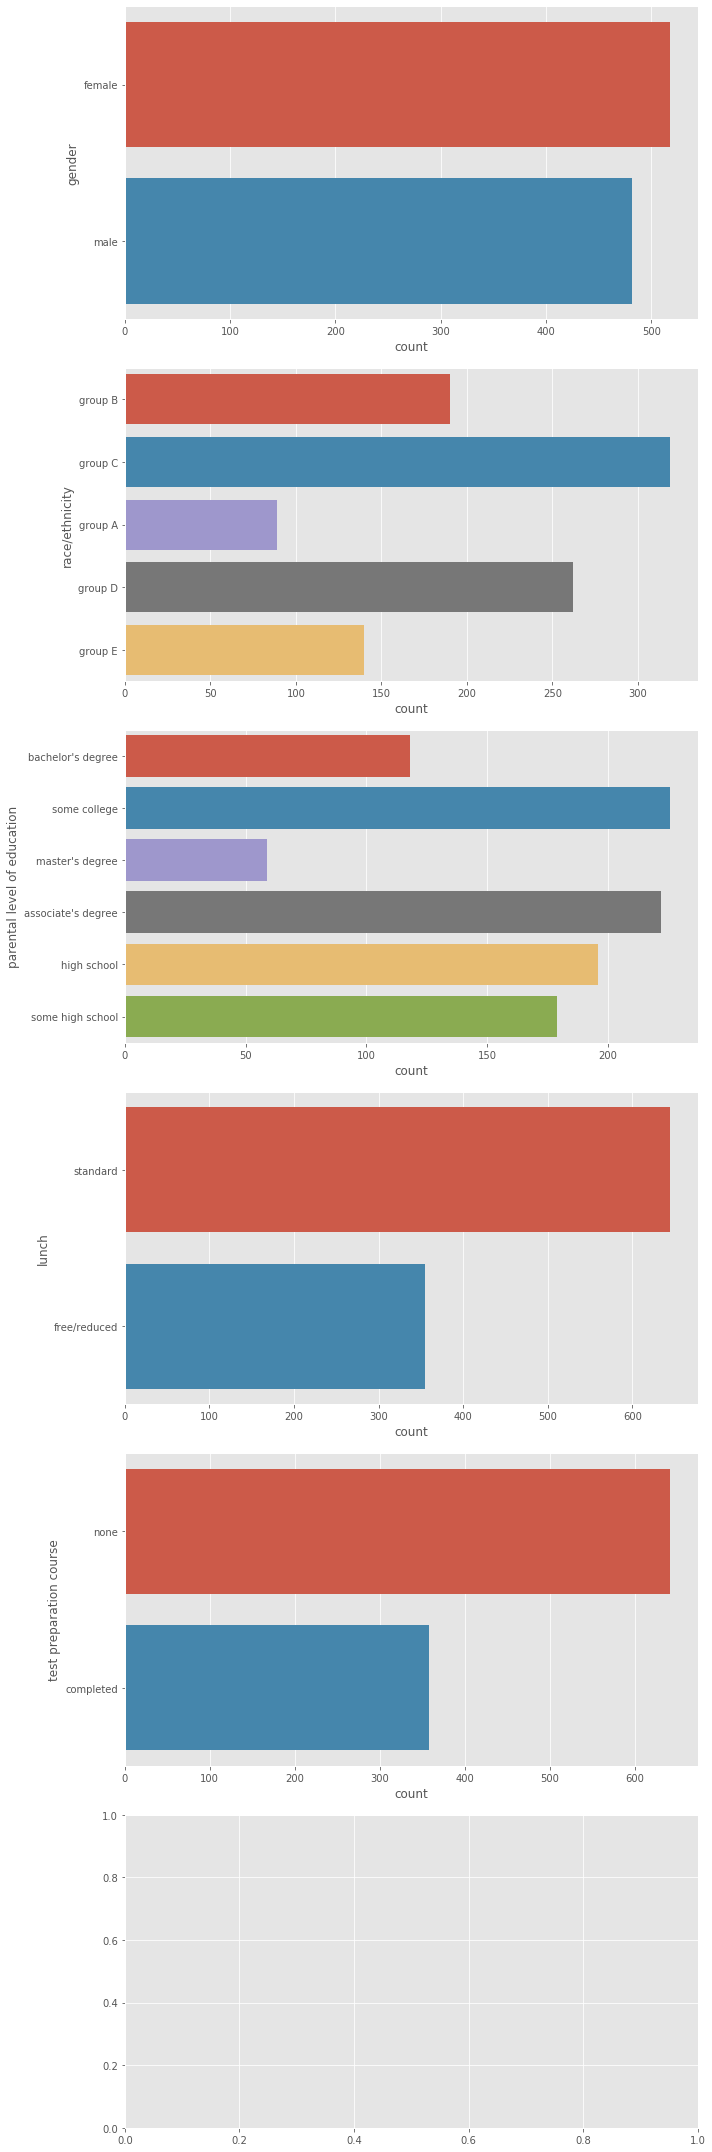

In [25]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,30))
for i,col in enumerate(categorical_columns,1):
    print(i,col)
    plt.subplot(6,1,i)
    sns.countplot(data=df,y=col)
    plt.subplot(6,1,i+1)
    stud_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
    plt.cla()
plt.tight_layout()
plt.show()

### Observatios

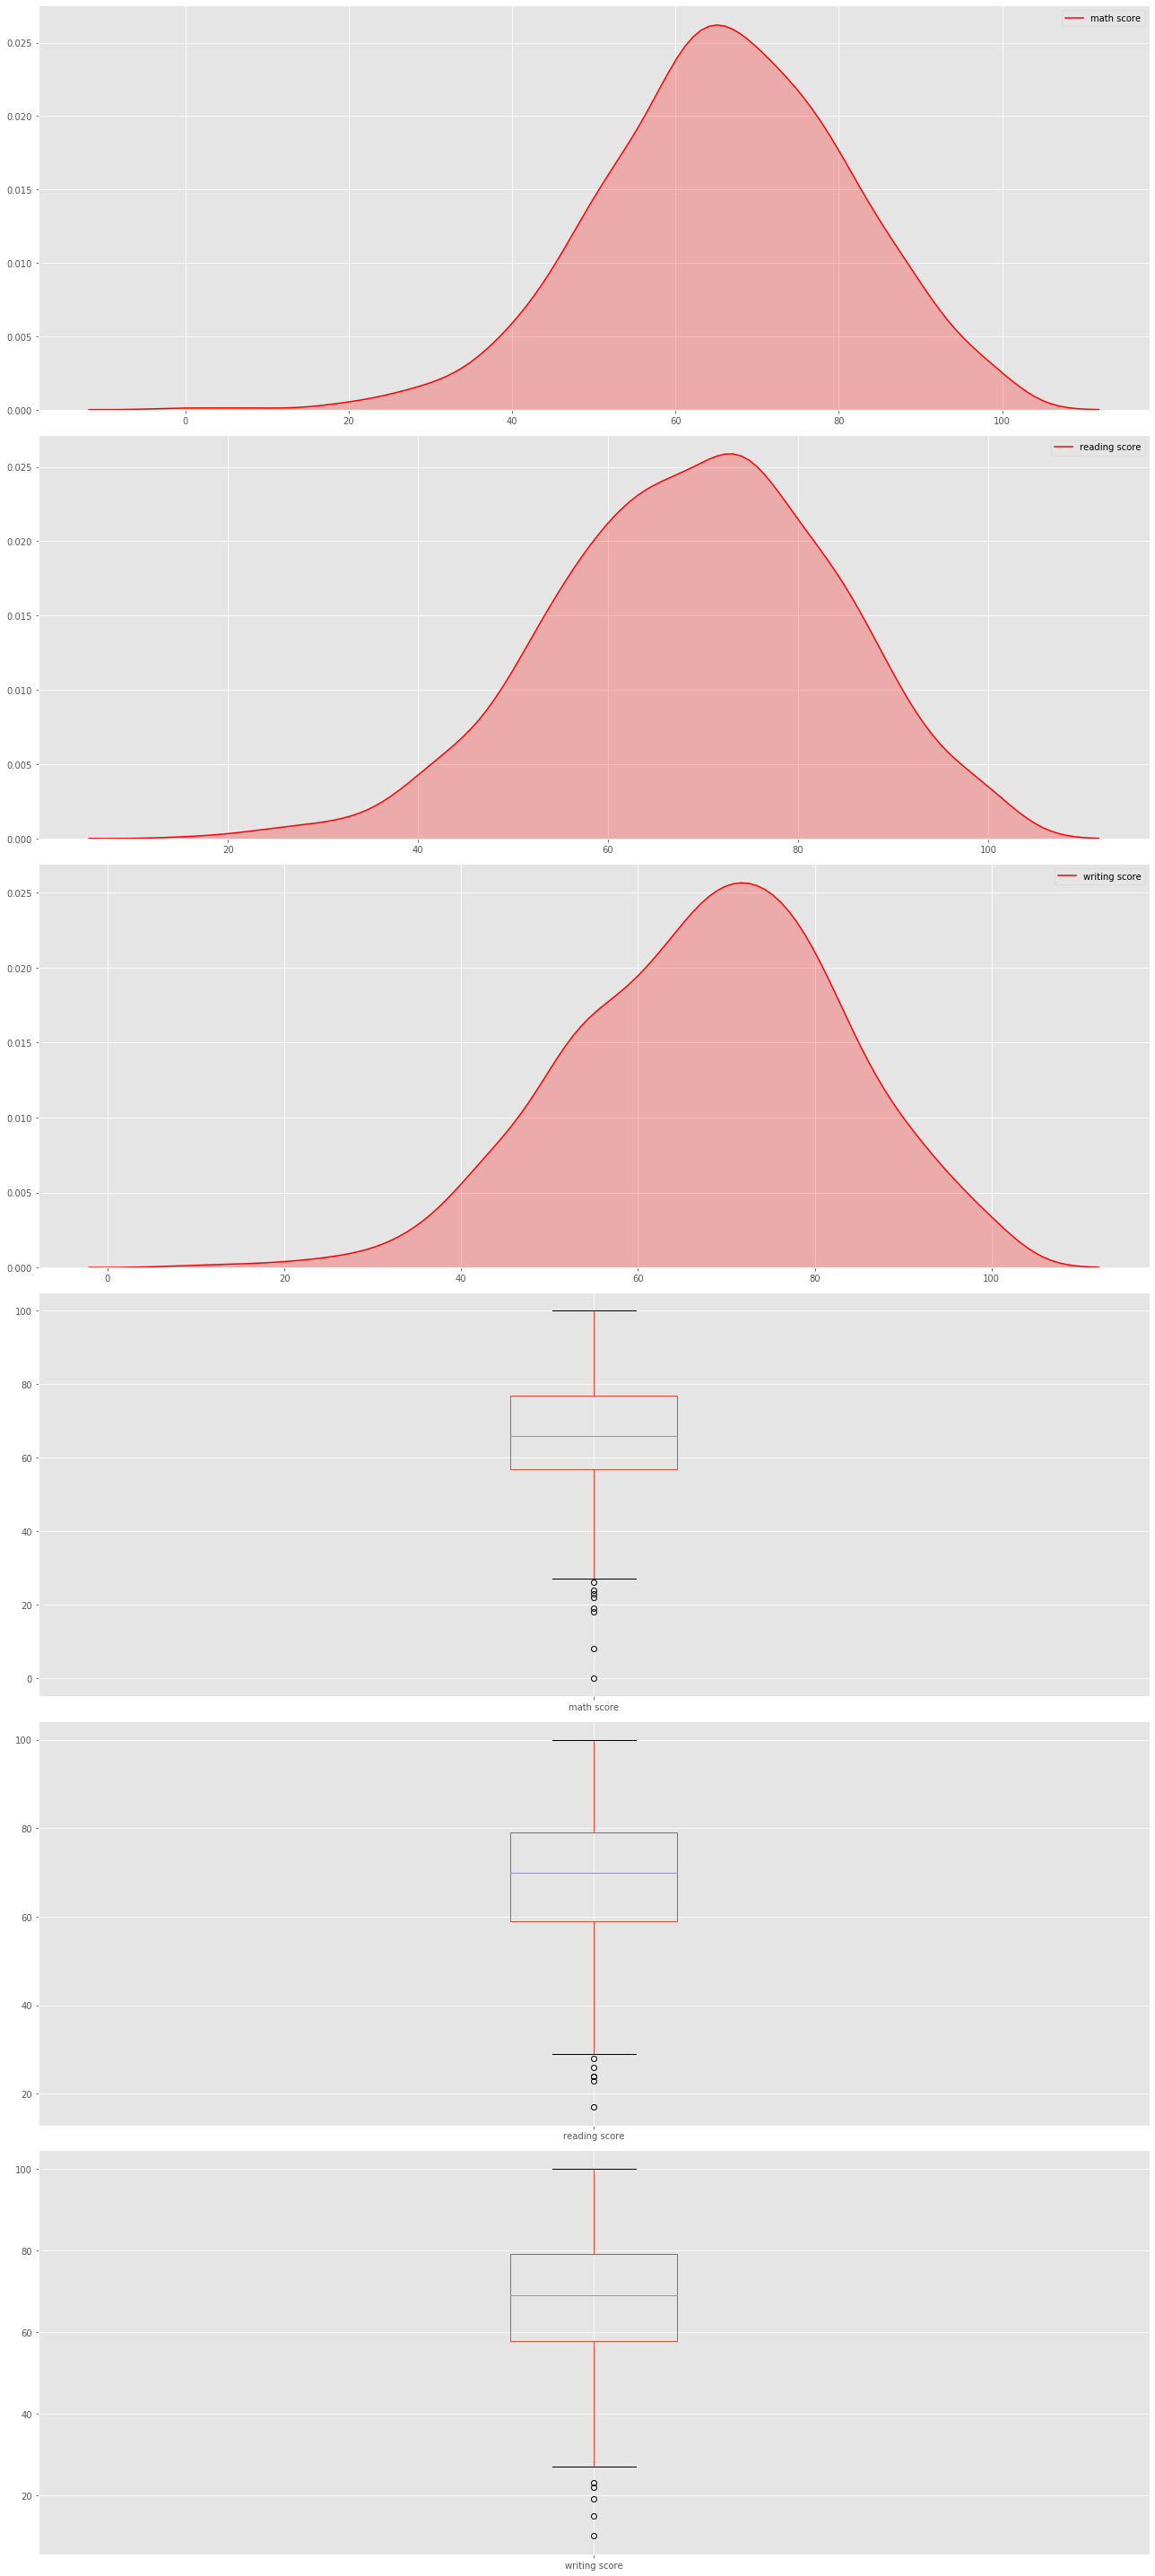

,math score,reading score,writing score
skewness,-0.278935,-0.259105,-0.289444
kurtosis,0.274964,-0.068265,-0.033365


In [26]:
#analying numerical variables
plt.figure(figsize=(18,40))
for i,col in enumerate(numerical_columns,1):
    plt.subplot(6,1,i)
    sns.kdeplot(stud_data[col],color='r',shade=True)
    plt.subplot(6,1,i+3)
    stud_data[col].plot.box()
plt.tight_layout()
plt.show()
numerical_data=stud_data[numerical_columns]
pd.DataFrame(data=[numerical_data.skew(),numerical_data.kurtosis()],index=['skewness','kurtosis'])
    

## Bivariate analysis

In [27]:
#a categorical variable based on percentage of scores in all the subjects
stud_data['percentage_score']=stud_data.mean(axis=1)
def per_cat(percentage_score):
    if percentage_score<=35:
        return "Fail"
    elif percentage_score<=55:
        return "Average"
    elif percentage_score<=75:
        return "Merit"
    else:
        return "Distinction"
stud_data['per_cat']=stud_data['percentage_score'].apply(per_cat)
stud_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage_score,per_cat
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Merit
1,female,group C,some college,standard,completed,69,90,88,82.333333,Distinction
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Distinction
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Average
4,male,group C,some college,standard,none,76,78,75,76.333333,Distinction


In [28]:
stud_data['per_cat'].value_counts()

Merit          494
Distinction    313
Average        175
Fail            18
Name: per_cat, dtype: int64

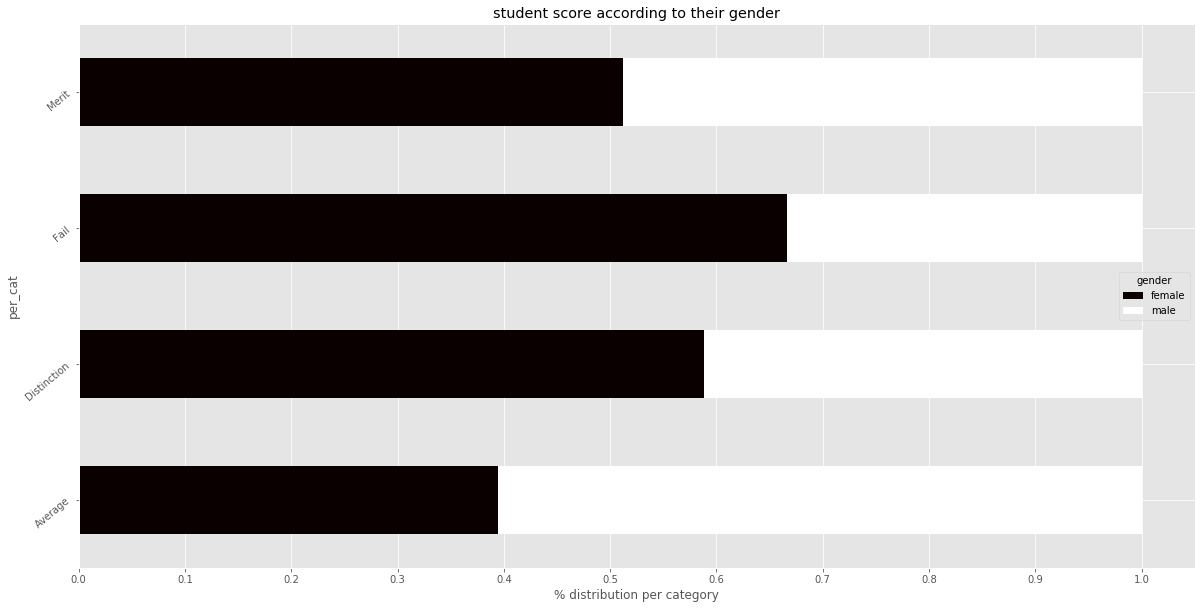

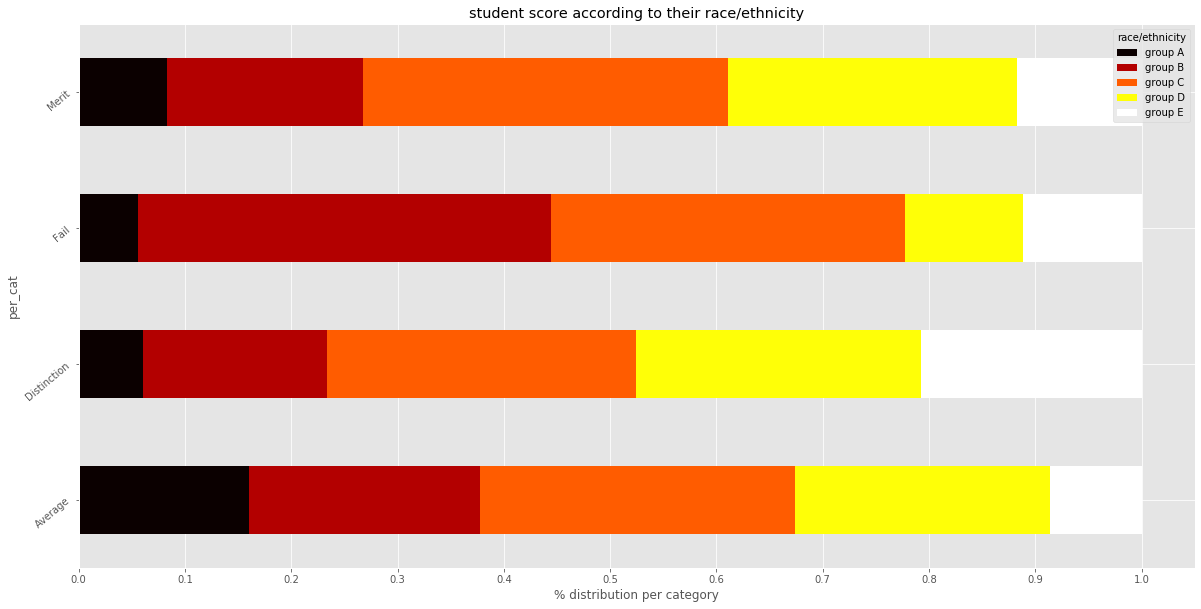

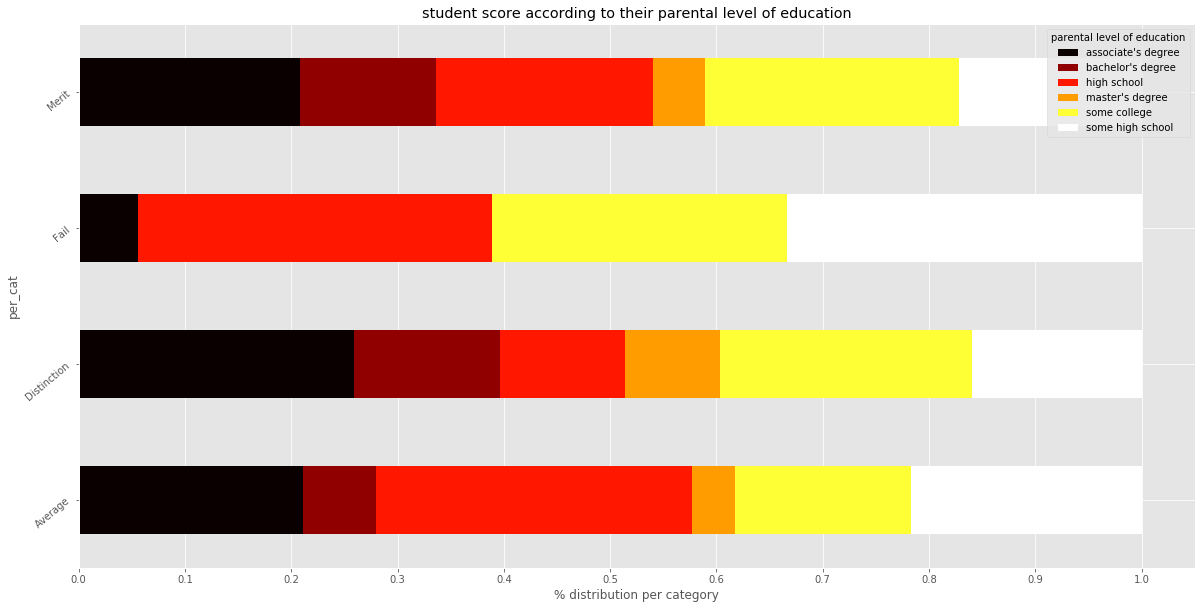

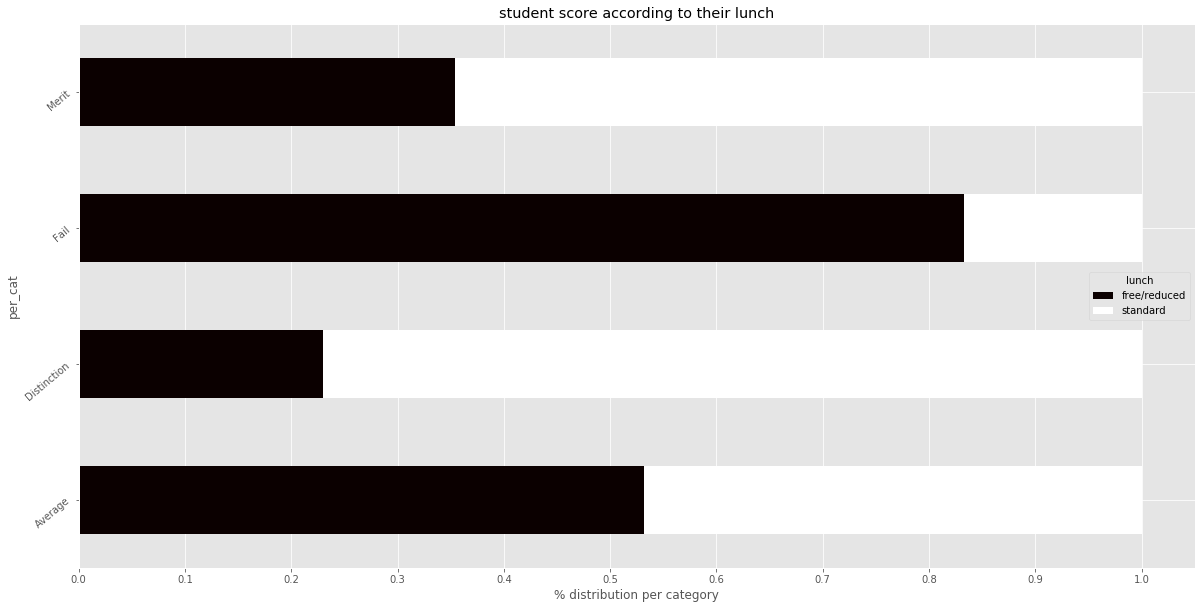

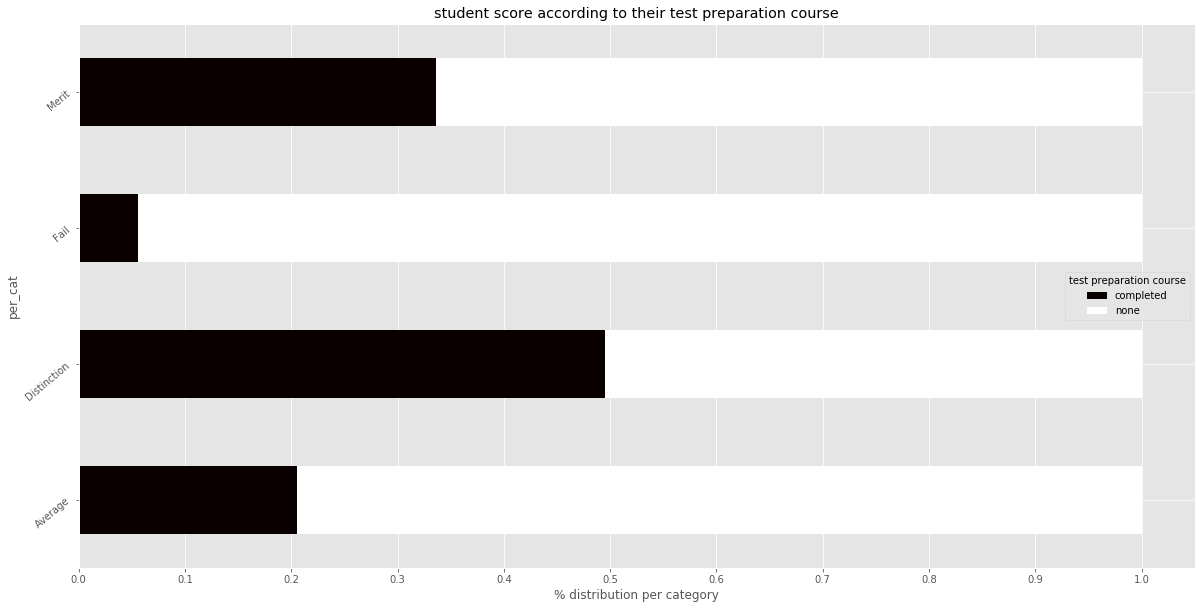

In [29]:
for col in categorical_columns:
    cross=pd.crosstab(index=stud_data['per_cat'],columns=stud_data[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("student score according to their {}".format(col))
plt.show()

### Observations: 

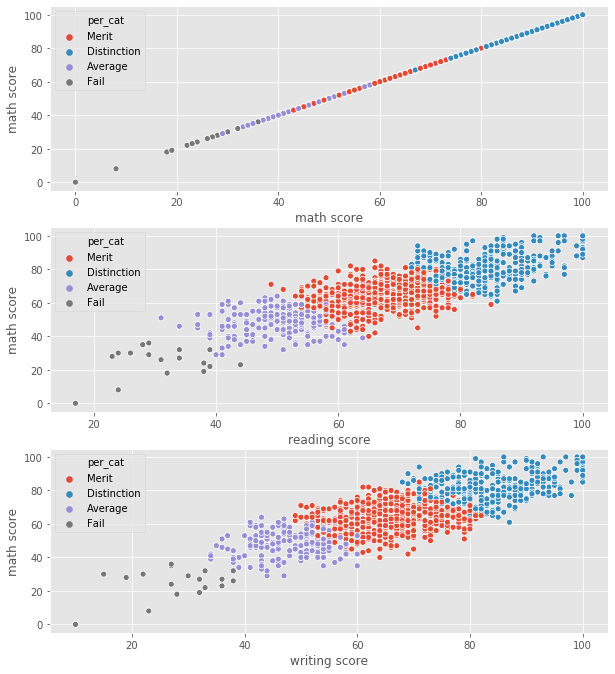

In [30]:
target='math score'
plt.figure(figsize=(10,40))
for i,col in enumerate(numerical_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=stud_data,x=col,y=target,hue='per_cat')
    else:
        sns.scatterplot(data=stud_data,x=col,y=target,hue='per_cat')
plt.show()        

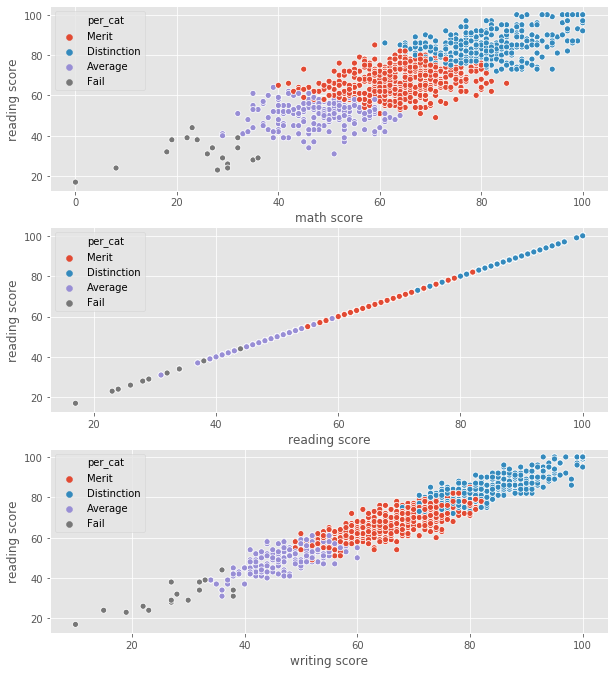

In [31]:
target='reading score'
plt.figure(figsize=(10,40))
for i,col in enumerate(numerical_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=stud_data,x=col,y=target,hue='per_cat')
    else:
        sns.scatterplot(data=stud_data,x=col,y=target,hue='per_cat')
plt.show()        

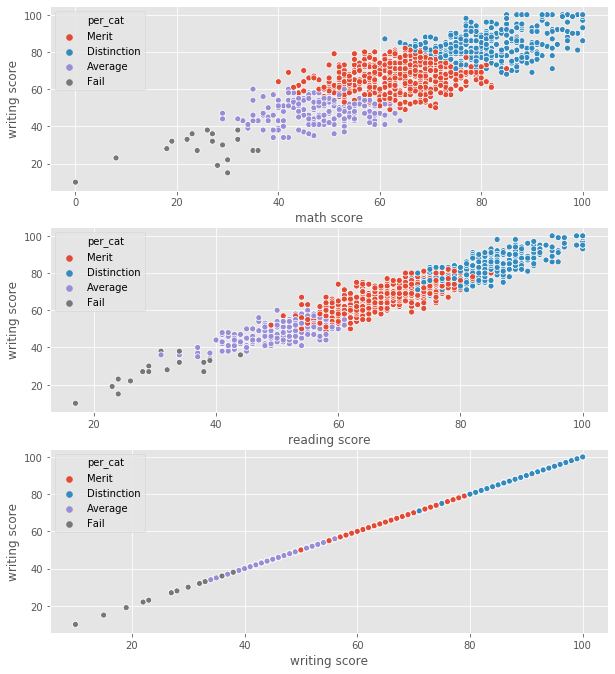

In [32]:
target='writing score'
plt.figure(figsize=(10,40))
for i,col in enumerate(numerical_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=stud_data,x=col,y=target,hue='per_cat')
    else:
        sns.scatterplot(data=stud_data,x=col,y=target,hue='per_cat')
plt.show()        

### Multivariate analysis

In [33]:
stud_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   percentage_score             1000 non-null   float64
 9   per_cat                      1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


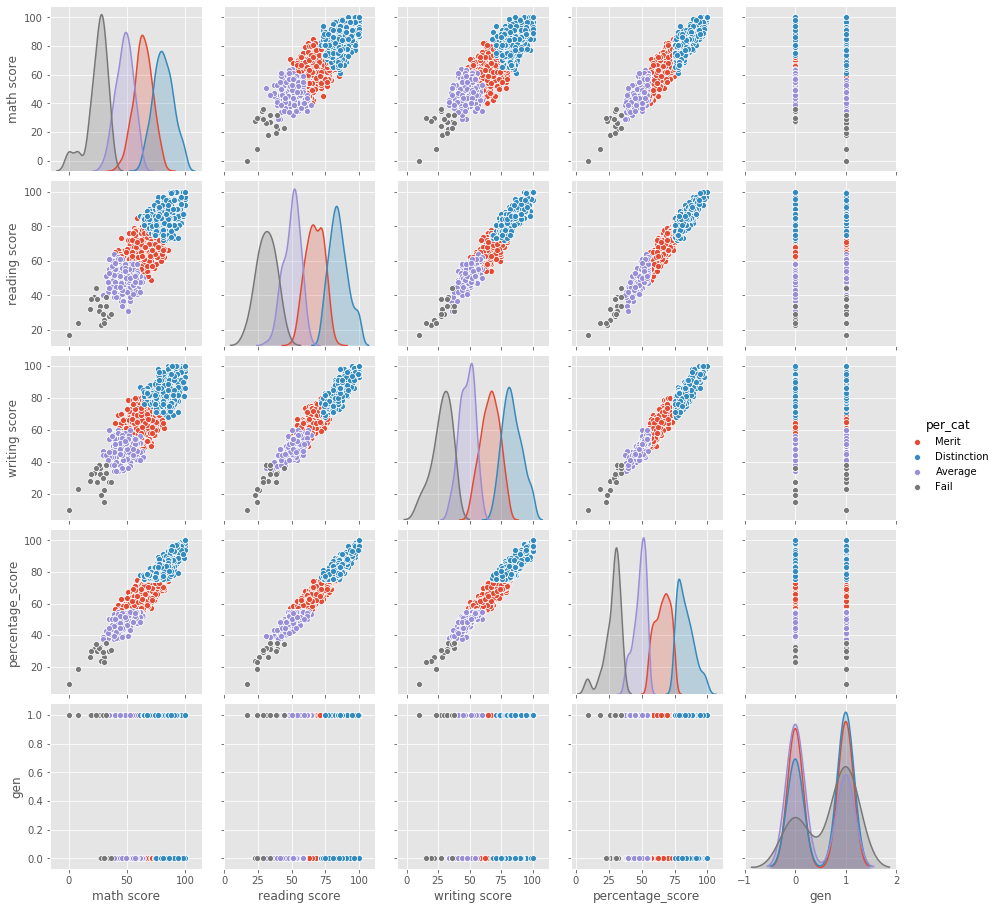

In [34]:
def gen(gender):
    if gender=="male":
        return 0
    else:
        return 1
stud_data['gen']=stud_data['gender'].apply(gen)
selected_features=stud_data.drop(columns=['per_cat','parental level of education','test preparation course','gender','race/ethnicity','lunch']).columns
selected_features
sns.pairplot(stud_data,hue='per_cat',vars=selected_features)
plt.show()